In [ ]:
#Description: This program optimizes a stock portfolio by modeling closing price of top 100 most popular stocks on Robinhood. Data collected from 02/19/2018 to 02/19/2021

In [63]:
import pandas as pd
import numpy as np
import requests

from datetime import datetime
from concurrent import futures

from matplotlib.ticker import FuncFormatter
from pandas import DataFrame
import pandas_datareader.data as web


In [ ]:
pip install PyPortfolioOpt

In [ ]:
#Loading data
from google.colab import files
files.upload()

In [66]:
df = pd.read_csv('Momentum_3yrs.csv')

In [67]:
df.head()

,Date,AAL,AAPL,ABNB,ACB,AMD,AMZN,APHA,ARKK,AZN,BA,BABA,BAC,BIOX,BLNK,BNGO,BNTX,BYDDY,BYND,CCIV,CCL,CGC,COST,CPRX,CRON,CTRM,DAL,DIS,DKNG,DNN,ET,F,FB,FCEL,FUBO,GE,GEVO,GM,GME,GNUS,...,OCGN,OGI,OXY,PENN,PFE,PLTR,PLUG,PSEC,PTON,PYPL,RCL,RIOT,RYCEY,SAVE,SBUX,SENS,SHOP,SIRI,SNAP,SNDL,SNE,SOS,SPCE,SPY,SQ,T,TLRY,TNXP,TSLA,TWTR,TXMD,UAL,UBER,VOO,WKHS,WMT,XOM,ZM,ZNGA,ZOM
0,2/21/2018,52.779999,42.767502,NaN,101.040001,11.72,1482.920044,11.373,41.070000,33.830002,352.369995,188.820007,31.870001,NaN,3.01,NaN,NaN,18.809999,NaN,NaN,69.580002,22.594000,185.750000,3.15,NaN,NaN,53.160000,105.050003,NaN,0.48,16.260000,10.60,177.910004,20.760000,NaN,13.932692,9.6,40.560001,15.69,2.59,...,153.179993,NaN,67.209999,27.16,33.927895,NaN,1.99,6.72,NaN,76.510002,130.550003,10.60,11.82,39.910000,56.099998,2.64,132.899994,6.13,18.639999,NaN,49.500000,50.099998,10.00,270.049988,44.099998,36.310001,NaN,328.0,66.660004,33.380001,5.11,67.000000,NaN,248.110001,2.87,91.519997,74.889999,NaN,3.56,2.07
1,2/22/2018,52.980000,43.125000,NaN,101.519997,11.84,1485.339966,11.150,40.990002,33.689999,355.920013,188.750000,31.690001,NaN,3.05,NaN,NaN,18.719999,NaN,NaN,68.199997,22.340000,186.589996,3.15,NaN,NaN,52.549999,105.239998,NaN,0.48,16.670000,10.63,178.990005,20.520000,NaN,14.057692,9.6,40.910000,15.62,2.58,...,155.399994,NaN,67.919998,26.17,33.908916,NaN,1.88,6.70,NaN,77.699997,129.600006,9.98,11.84,39.480000,55.400002,2.68,134.179993,6.15,17.510000,NaN,49.849998,49.400002,10.02,270.399994,44.900002,36.470001,NaN,338.0,69.234001,32.110001,5.01,66.699997,NaN,248.410004,3.16,92.769997,75.860001,NaN,3.52,2.16
2,2/23/2018,53.389999,43.875000,NaN,100.211998,12.07,1500.000000,10.930,41.509998,34.009998,356.660004,193.289993,32.029999,NaN,2.99,NaN,NaN,18.740000,NaN,NaN,68.760002,22.040001,189.809998,3.23,NaN,NaN,53.459999,107.250000,NaN,0.50,16.700001,10.70,183.289993,20.760000,NaN,13.932692,9.4,40.910000,15.97,2.53,...,155.399994,NaN,68.320000,26.67,34.402279,NaN,1.96,6.70,NaN,79.690002,130.199997,10.27,11.88,39.490002,56.139999,2.94,137.000000,6.27,17.450001,NaN,50.230000,48.799999,10.02,274.709992,44.860001,36.720001,NaN,340.0,70.410004,32.660000,5.37,67.570000,NaN,252.490006,3.19,92.889999,77.529999,NaN,3.60,2.06
3,2/26/2018,55.000000,44.742500,NaN,96.480003,12.42,1521.949951,10.170,42.360001,34.189999,363.480011,194.190002,32.419998,NaN,3.05,NaN,NaN,19.049999,NaN,NaN,68.639999,21.549999,192.809998,3.19,NaN,NaN,54.689999,109.809998,NaN,0.49,16.340000,10.89,184.929993,20.520000,NaN,14.086538,9.2,41.540001,16.08,2.59,...,157.199997,NaN,67.269997,27.18,35.189754,NaN,1.96,6.72,NaN,79.349998,130.399994,9.90,12.07,40.080002,57.169998,2.84,136.270004,6.33,17.090000,NaN,50.919998,47.400002,10.03,277.899994,46.549999,37.459999,NaN,353.0,71.484001,32.160000,5.42,69.260002,NaN,255.399994,3.21,93.120003,78.839996,NaN,3.61,2.03
4,2/27/2018,54.259998,44.597500,NaN,93.000000,12.53,1511.979980,9.705,41.689999,33.849998,364.640015,188.259995,32.330002,NaN,2.97,NaN,NaN,18.480000,NaN,NaN,67.489998,20.636000,190.100006,3.17,7.62,NaN,53.619999,104.870003,NaN,0.48,15.950000,10.61,181.460007,19.559999,NaN,13.942308,9.4,40.169998,15.57,2.49,...,156.000000,NaN,66.750000,26.35,34.914612,NaN,1.90,6.64,NaN,79.459999,128.860001,9.96,11.99,38.750000,56.570000,2.85,137.660004,6.29,16.320000,NaN,50.270000,49.500000,10.02,274.429993,45.910000,36.869999,NaN,347.0,70.197998,31.320000,5.27,67.860001,NaN,252.139999,3.20,91.519997,77.500000,NaN,3.50,2.10


In [68]:
#Set the date as index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

#Removing column date
df.drop(columns=['Date'], axis=1, inplace = True)

In [69]:
#Optimize the portfolio
from pypfopt.efficient_frontier import EfficientFrontier 
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.cla import CLA
from pypfopt import discrete_allocation
import pypfopt.plotting as pplt

In [70]:
#Calculate the expected annualized returns
mu = expected_returns.mean_historical_return(df)

In [71]:
#Calculate the annualized sample covariance matrix of the daily asset returns
S = risk_models.sample_cov(df)

/usr/local/lib/python3.6/dist-packages/pypfopt/risk_models.py:69: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  "The covariance matrix is non positive semidefinite. Amending eigenvalues."
/usr/local/lib/python3.6/dist-packages/pypfopt/risk_models.py:88: UserWarning: Could not fix matrix. Please try a different risk model.
  "Could not fix matrix. Please try a different risk model.", UserWarning


In [72]:
ef = EfficientFrontier(mu, S) #creates the efficient frontier object
weights = ef.max_sharpe() #maximize the sharpe ratio and produce the raw weights

cleaned_weights = ef.clean_weights() #Helper method to clean the clean (absolute value and rounding) the raw weights


In [73]:
print(cleaned_weights)
print('\n')

OrderedDict([('AAL', 0.0), ('AAPL', 0.0), ('ABNB', 0.11705), ('ACB', 0.0), ('AMD', 0.0), ('AMZN', 0.0), ('APHA', 0.0), ('ARKK', 0.0), ('AZN', 0.0), ('BA', 0.0), ('BABA', 0.0), ('BAC', 0.0), ('BIOX', 0.0), ('BLNK', 0.0), ('BNGO', 0.0), ('BNTX', 0.0), ('BYDDY', 0.0), ('BYND', 0.0), ('CCIV', 0.48235), ('CCL', 0.0), ('CGC', 0.0), ('COST', 0.0), ('CPRX', 0.0), ('CRON', 0.0), ('CTRM', 0.0), ('DAL', 0.0), ('DIS', 0.0), ('DKNG', 0.0), ('DNN', 0.0), ('ET', 0.0), ('F', 0.0), ('FB', 0.0), ('FCEL', 0.0), ('FUBO', 0.0), ('GE', 0.0), ('GEVO', 0.0), ('GM', 0.0), ('GME', 0.0), ('GNUS', 0.00122), ('GOOGL', 0.0), ('GPRO', 0.0), ('GRWG', 0.0), ('GSAT', 0.0), ('HEXO', 0.0), ('IDEX', 0.0), ('ILMN', 0.0), ('INO', 0.00226), ('IVR', 0.00882), ('JBLU', 0.0), ('JMIA', 0.0), ('JNJ', 0.0), ('KO', 0.0), ('LMND', 0.0), ('LU', 0.01054), ('LUV', 0.0), ('MARA', 0.0), ('MGM', 0.0), ('MRNA', 0.0), ('MRO', 0.0), ('MSFT', 0.0), ('NAK', 0.0), ('NCLH', 0.0), ('NFLX', 0.0), ('NIO', 0.0), ('NKE', 0.0), ('NNDM', 0.0), ('NRZ', 

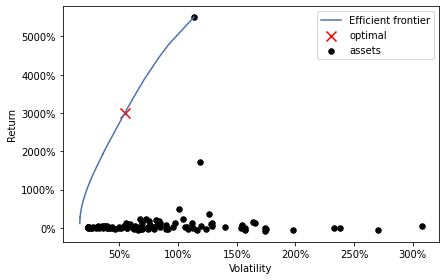

In [88]:
cl_obj = CLA(mu, S)

#Plotting the Efficient Frontier and Optimizing Portfolio Allocation
ax = pplt.plot_efficient_frontier(cl_obj, showfig = False)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

In [74]:
# 2year risk free rate - Treasury Yield as of 02/19/2021
ef.portfolio_performance(verbose=True, risk_free_rate = 0.0134)

Expected annual return: 3001.8%
Annual volatility: 54.6%
Sharpe Ratio: 54.96


/usr/local/lib/python3.6/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:407: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  UserWarning,


(30.018377526672893, 0.5458077142519236, 54.961439245665936)

In [75]:
#Convert the weights into an actual allocation, telling investors how many shares of each asset you should purchase
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

In [76]:
#Allocation of a $20,000 investment
portfolio_val = 20000
latest_prices = get_latest_prices(df)
weights = cleaned_weights

da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = portfolio_val)
allocation, leftover = da.lp_portfolio()

In [77]:
print('Number of Stock to Buy:', allocation)
print('Remaining Funds: $', leftover)

Number of Stock to Buy: {'ABNB': 12, 'CCIV': 182, 'GNUS': 13, 'INO': 3, 'IVR': 45, 'LU': 12, 'PLTR': 110, 'PTON': 5, 'SNDL': 383, 'SPCE': 3, 'WKHS': 4, 'ZNGA': 227}
Remaining Funds: $ 0.08007108500169124


In [78]:
#Create a function to get the companies name
def get_company_name(symbol):
  url = 'http://d.yimg.com/autoc.finance.yahoo.com/autoc?query='+symbol+'&region=1&lang=en'
  result = requests.get(url).json()
  for r in result['ResultSet']['Result']:
    if r['symbol']==symbol:
      return r['name']

In [79]:

company_name = []
discrete_allocation_list = []
for symbol in allocation:
  #Store company name into a list
  company_name.append(get_company_name(symbol))
  #Get the discrete allocation values
  discrete_allocation_list.append(allocation.get(symbol))

In [80]:
#Create a dataframe for the portfolio
portfolio_df = pd.DataFrame(columns=['Company Name','Ticker', 'Stock Allocated for $'+str(portfolio_val)])

In [81]:
portfolio_df['Company Name'] = company_name
portfolio_df['Ticker'] = allocation
portfolio_df['Stock Allocated for $'+str(portfolio_val)] = discrete_allocation_list

In [82]:
#Display optimized portfolio
portfolio_df

,Company Name,Ticker,Stock Allocated for $20000
0,"Airbnb, Inc.",ABNB,12
1,Churchill Capital Corp IV,CCIV,182
2,"Genius Brands International, Inc.",GNUS,13
3,"Inovio Pharmaceuticals, Inc.",INO,3
4,Invesco Mortgage Capital Inc.,IVR,45
5,Lufax Holding Ltd,LU,12
6,Palantir Technologies Inc.,PLTR,110
7,"Peloton Interactive, Inc.",PTON,5
8,Sundial Growers Inc.,SNDL,383
9,"Virgin Galactic Holdings, Inc.",SPCE,3


In [87]:
portfolio_df.to_csv('OptimalPortfolio.csv', index = False, header=True)